In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle
import os
import networkx as nx

SOLUTION_DIR = './solutions/'

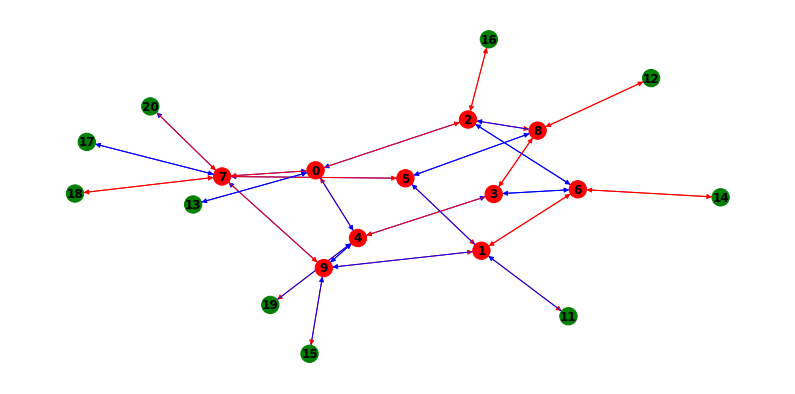

In [28]:
def v_flow_routes_per_talker_listener_pair(filename):
    with open(filename, 'rb') as file:
        # get solution
        solution = pickle.load(file)
        # get edge nodes and core nodes, then color them
        edge_nodes_id = []
        core_node_id = []
        node_colors = []
        for node_id in solution.graph.nx_graph.nodes:
            if solution.graph.nx_graph.degree(node_id) == 2:
                edge_nodes_id.append(node_id)
                node_colors.append('g')
            else:
                core_node_id.append(node_id)
                node_colors.append('r')
        # color edges
        edge_colors = []
        t = 1
        for edge_id in solution.graph.nx_graph.edges:
            if t == 1:
                edge_colors.append('b')
                t = 2
            else:
                edge_colors.append('r')
                t = 1
        # prepare figure & axes
        fig, ax = plt.subplots(figsize=(14,7))
        # draw graph
        options: dict = {'with_labels': True, 'font_weight': 'bold', 
                         'node_color': node_colors, 'edge_color': edge_colors}
        nx.draw(solution.graph.nx_graph, **options)
        plt.show()


filenames = os.listdir(SOLUTION_DIR)
for filename in filenames:
    if filename != 'placeholder':
        v_flow_routes_per_talker_listener_pair(os.path.join(SOLUTION_DIR, filename))
